In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('heartdisease.csv')
df.drop(columns='education',inplace=True)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [2]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)

data = df[['age','prevalentHyp','sysBP','diaBP']] 
y = df['TenYearCHD']

In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.6,random_state=50)

model.fit(x_train,y_train)

pred = model.predict(x_test)

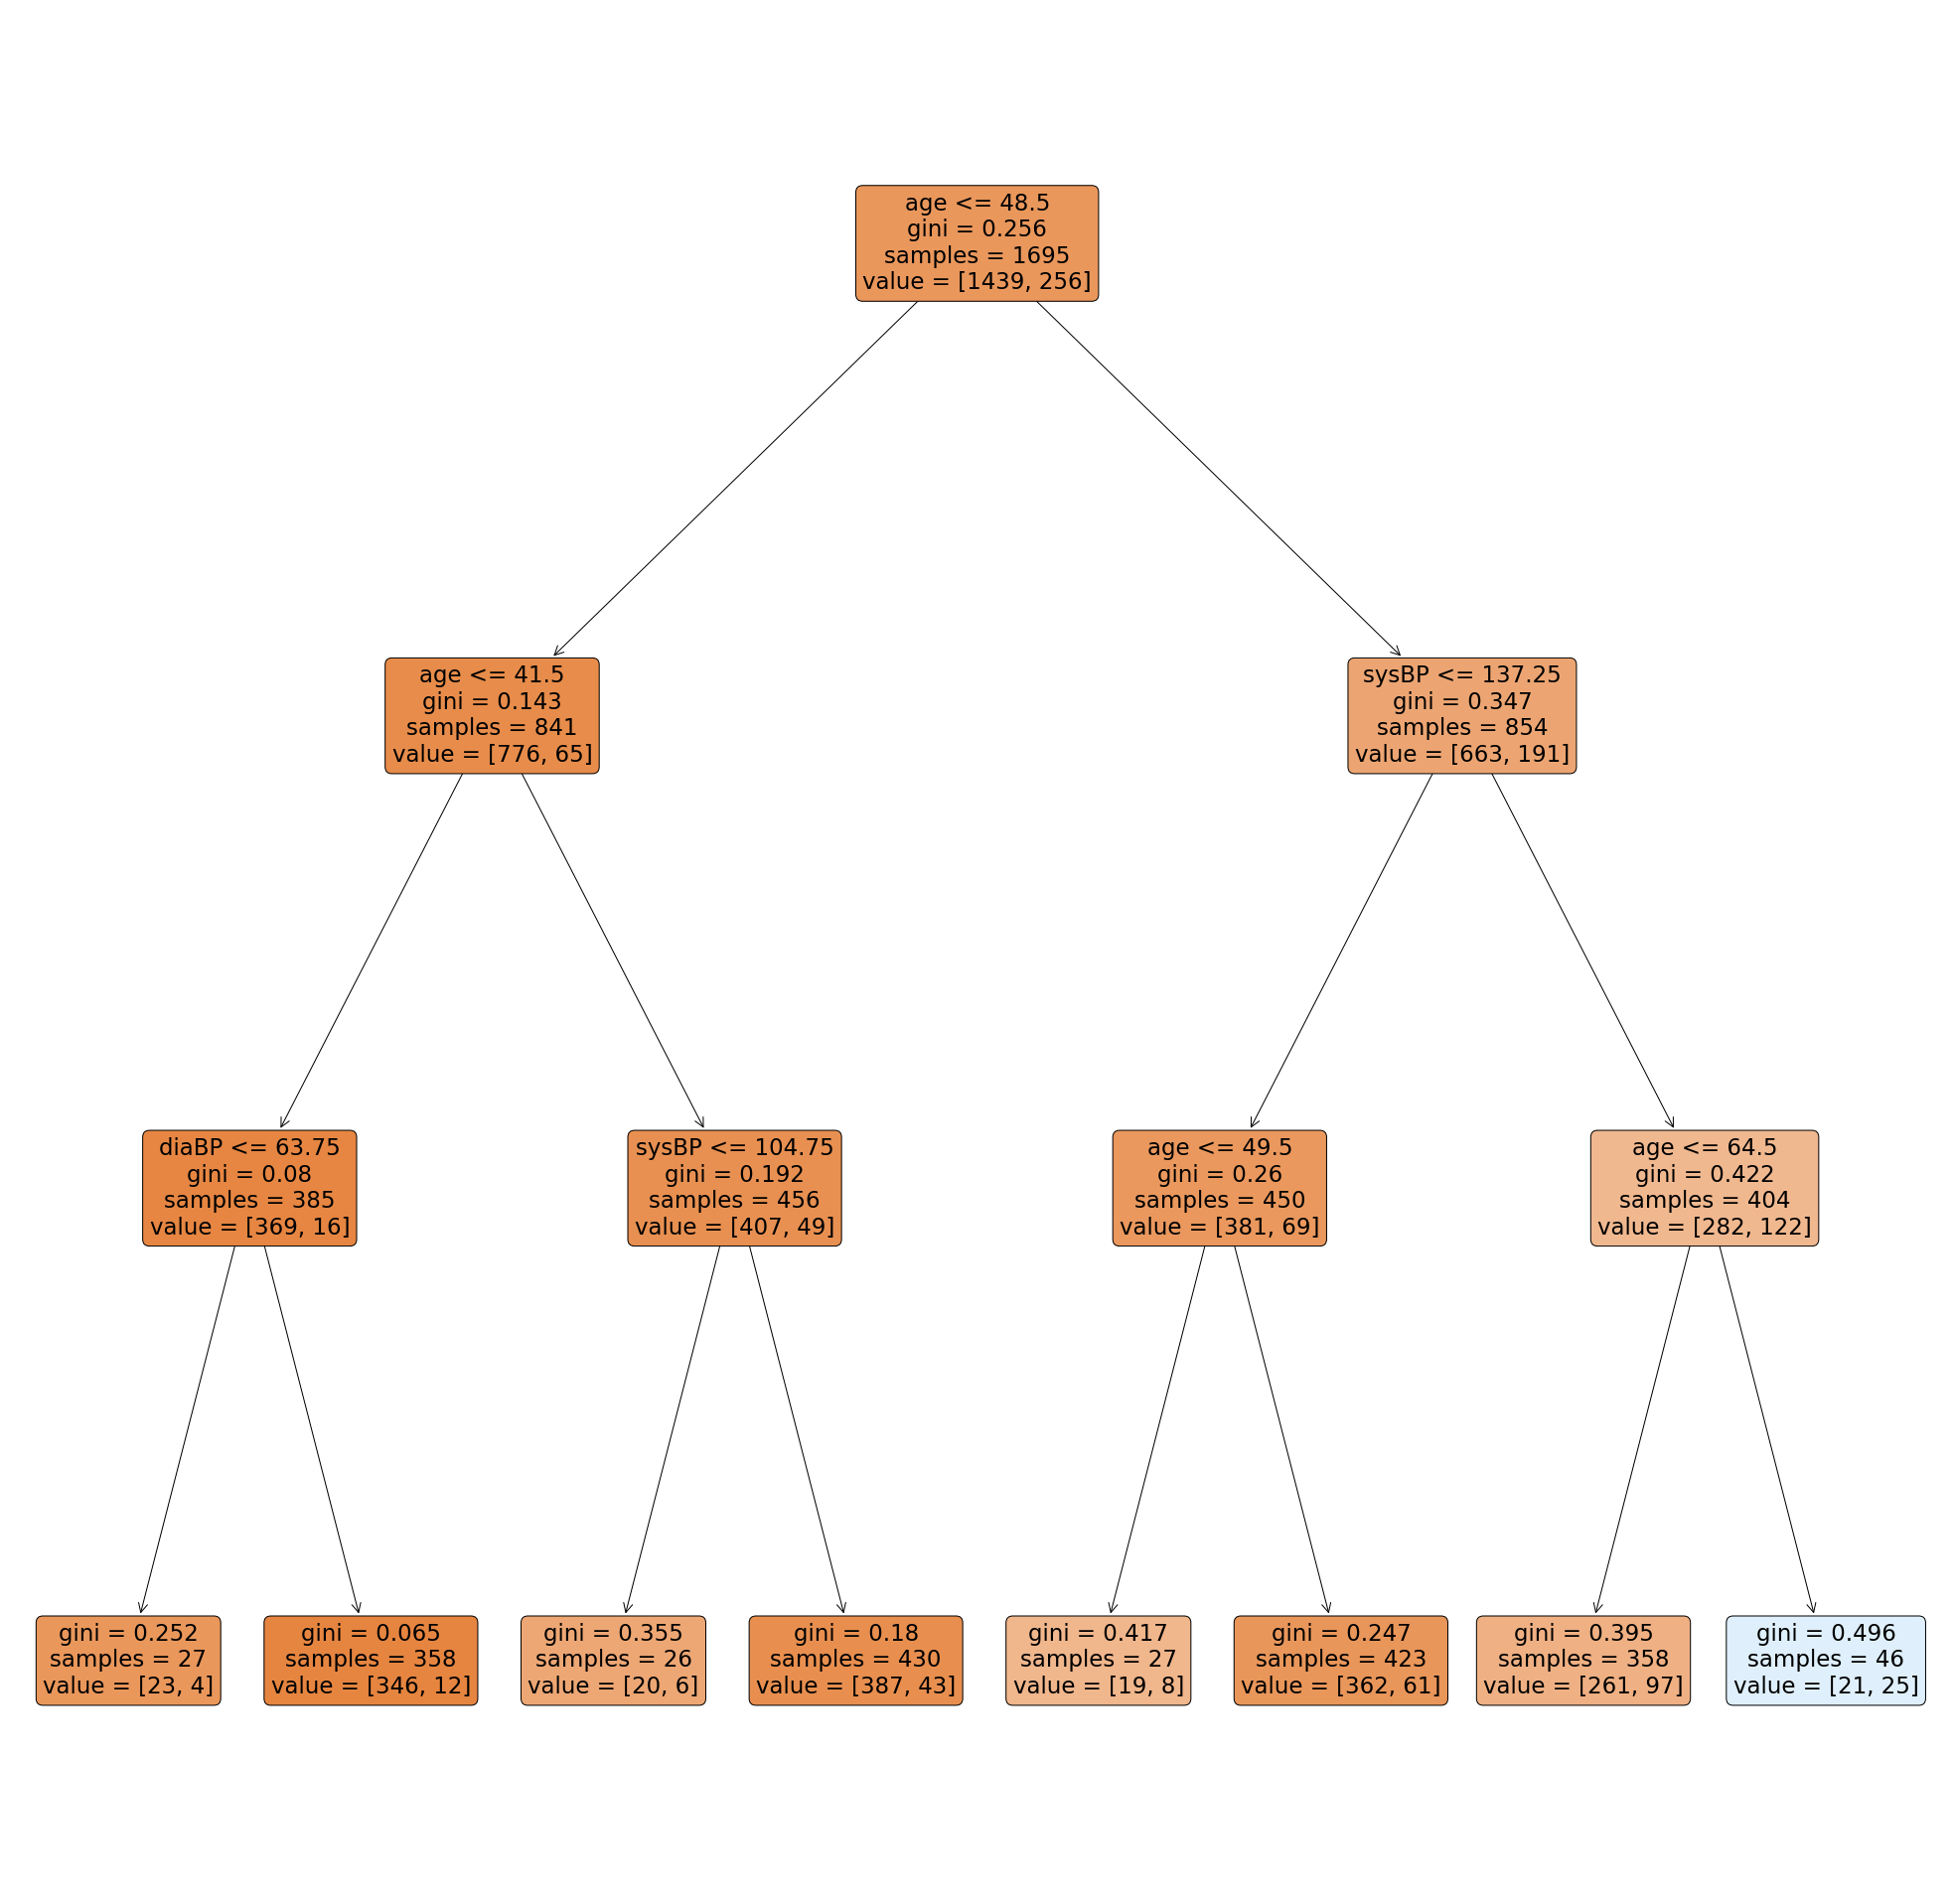

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

columns = ['age','prevalentHyp','sysBP','diaBP']

plt.figure(figsize=(35,35))
a = plot_tree(model,feature_names=columns,filled=True,rounded=True)

plt.show()

In [5]:
from sklearn.model_selection import KFold,cross_val_score

score = cross_val_score(model,data,y,cv=10)
score.mean()
#--> AVERAGE ACCUARCY OF THE MODEL

0.8475701413979214

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2155
           1       0.31      0.06      0.10       388

    accuracy                           0.84      2543
   macro avg       0.58      0.52      0.50      2543
weighted avg       0.77      0.84      0.79      2543

